In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import sqlite3

In [2]:
conn = sqlite3.connect('twitch.db')

In [3]:
sql = """
SELECT *
FROM Twitch_Directory
"""
# Read the sql query into pandas to view the results
twitch_data = pd.read_sql_query(sql, conn)
twitch_data.head()

,index,Date,Time,Directory Name,Viewer Count
0,0,2022-01-31,10:45:52,Just Chatting,390431
1,1,2022-01-31,10:45:52,Grand Theft Auto V,239160
2,2,2022-01-31,10:45:52,League of Legends,219827
3,3,2022-01-31,10:45:52,VALORANT,137060
4,4,2022-01-31,10:45:52,Fortnite,115131


Cleaning Data

In [4]:
twitch_data.drop(columns=['index'], inplace=True)

In [5]:
directory_names = {
    "LOST ARK" : 'Lost Ark'
}
twitch_data.replace(directory_names, inplace=True)

In [6]:
twitch_data['Directory Name'].unique()

array(['Just Chatting', 'Grand Theft Auto V', 'League of Legends',
       'VALORANT', 'Fortnite', 'Pokémon Legends: Arceus',
       'Counter-Strike: Global Offensive', 'FIFA 22', 'Sports',
       'Apex Legends', 'Dota 2', 'Escape from Tarkov',
       'Dying Light 2: Stay Human', 'Cities: Skylines', 'Rust',
       'Path of Exile', 'Sifu', 'Lost Ark', 'Slots',
       "Tom Clancy's Rainbow Six Siege", 'Minecraft',
       'Call of Duty: Warzone', 'Dead by Daylight',
       'Horizon Forbidden West', 'Mario Kart 8 Deluxe', 'Elden Ring',
       'Destiny 2', 'Politics', 'Rocket League', 'World of Warcraft',
       'Brawl Stars', 'WWE 2K22', 'Call of Duty: Modern Warfare 3',
       "Tiny Tina's Wonderlands", 'F1 2021', 'Hearthstone',
       'Fall Guys: Ultimate Knockout', 'Special Events', 'The Sims 4',
       'The Long Drive', 'PUBG: BATTLEGROUNDS',
       'Final Fantasy XIV Online', 'Overwatch',
       'Holdfast: Nations At War', 'Vampire Survivors', 'Marauders',
       'Evil Dead: The Game',

In [7]:
twitch_data['Month'] = pd.DatetimeIndex(twitch_data['Date']).month
twitch_data['Day'] = pd.DatetimeIndex(twitch_data['Date']).day

In [8]:
months= {
    1 : 'Jan', 
    2 : 'Feb', 
    3 : 'Mar', 
    4 : 'Apr', 
    5 : 'May', 
    6 : 'Jun', 
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep', 
    10 : 'Oct', 
    11 : 'Nov', 
    12 : 'Dec'
}

In [9]:
twitch_data['Month'].replace(months, inplace=True)


In [10]:
twitch_data

,Date,Time,Directory Name,Viewer Count,Month,Day
0,2022-01-31,10:45:52,Just Chatting,390431,Jan,31
1,2022-01-31,10:45:52,Grand Theft Auto V,239160,Jan,31
2,2022-01-31,10:45:52,League of Legends,219827,Jan,31
3,2022-01-31,10:45:52,VALORANT,137060,Jan,31
4,2022-01-31,10:45:52,Fortnite,115131,Jan,31
...,...,...,...,...,...,...
1105,2022-05-23,10:45:25,Fortnite,69961,May,23
1106,2022-05-23,10:45:25,V Rising,64515,May,23
1107,2022-05-23,10:45:25,Counter-Strike: Global Offensive,64011,May,23
1108,2022-05-23,10:45:25,Dota 2,50749,May,23


In [11]:
twitch_data['Month'].value_counts()

Mar    310
Apr    300
Feb    280
May    210
Jan     10
Name: Month, dtype: int64

Jan and May can not be used as they were not tracked all 30-31 days

In [12]:
months_graph= twitch_data[twitch_data['Month'].isin(['Feb', 'Mar', 'Apr'])]

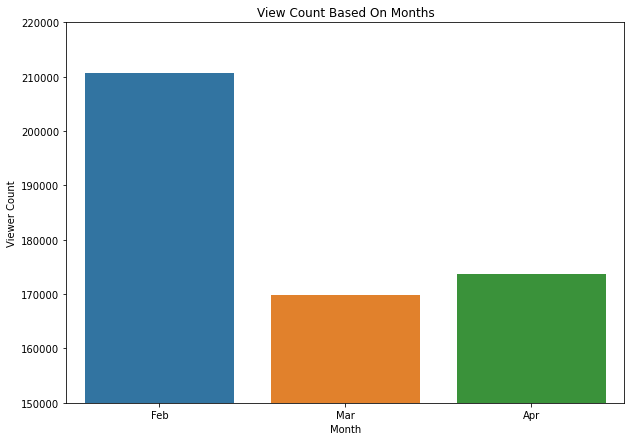

 Feb has the most viewers by 30,000 this is interesting as this could be related to many reasons. February also has two 
fewer days that are being taken into account. The most likely reason is since Feb is still considered the winter a lot more people
stay inside. March is the start of spring the fewer people are staying in and watching twitch. However, the argument for 
this is that the data was pulled at 10:45 am central. Meaning a lot of people would be in school or work and not viewing twitch. 
I think seeing what was being viewed in these months might depict this and give us a clearer answer. 



In [13]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x = months_graph['Month'],y= months_graph['Viewer Count'], ci=None)
plt.title('View Count Based On Months')
plt.ylim(150000, 220000)
plt.show()
print(""" Feb has the most viewers by 30,000 this is interesting as this could be related to many reasons. February also has two 
fewer days that are being taken into account. The most likely reason is since Feb is still considered the winter a lot more people
stay inside. March is the start of spring the fewer people are staying in and watching twitch. However, the argument for 
this is that the data was pulled at 10:45 am central. Meaning a lot of people would be in school or work and not viewing twitch. 
I think seeing what was being viewed in these months might depict this and give us a clearer answer. 
""")

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


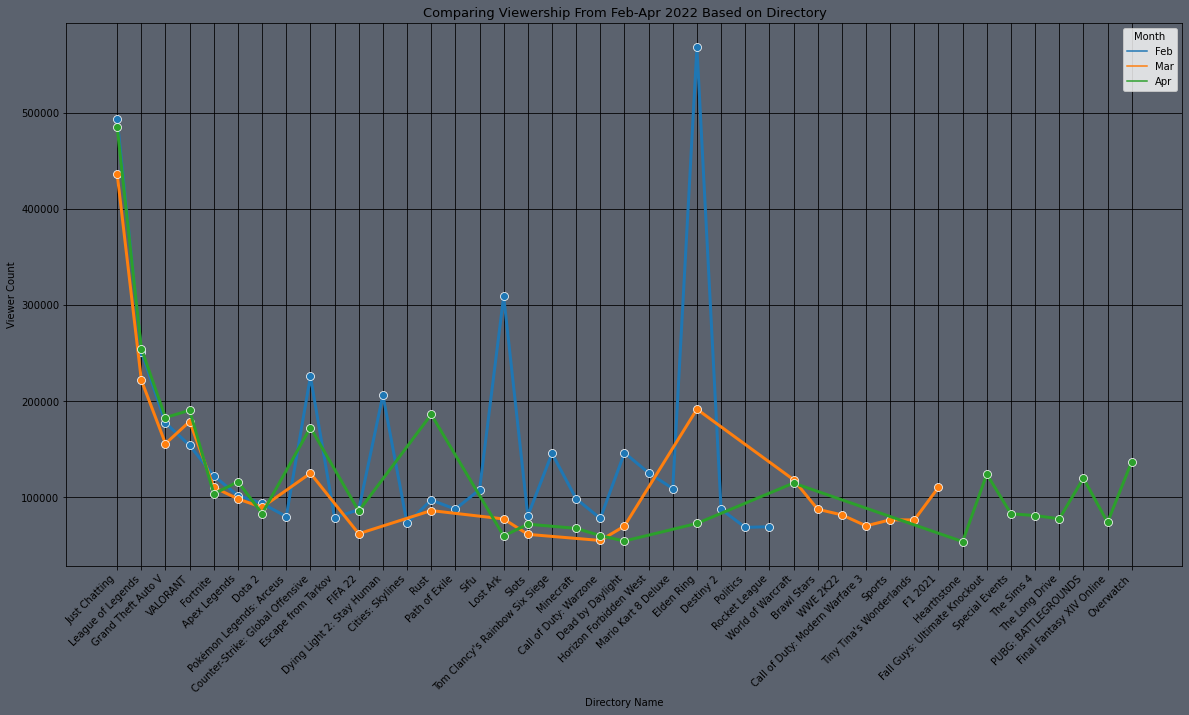

Now, this graph gives us a clear understanding of why February viewership was so high compared to March and April. 
In February two highly anticipated games were released and had some insane viewership within the first few weeks. These games 
being Elden Ring and Lost Ark. In the following month of March both of these directories fell off more than half of their peak 
viewership in February. This is very typical for twitch as games release they gain an initial boost and decline at extreme rates 
as people get over the release hype.



In [14]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')

sns.lineplot(months_graph['Directory Name'], months_graph['Viewer Count'], hue=months_graph['Month'],ci=None, marker='o',linewidth=3, markersize=8)
plt.title('Comparing Viewership From Feb-Apr 2022 Based on Directory', fontsize=13)
plt.xticks(rotation=45,ha='right')
plt.grid(c='black')
plt.show()
print('''Now, this graph gives us a clear understanding of why February viewership was so high compared to March and April. 
In February two highly anticipated games were released and had some insane viewership within the first few weeks. These games 
being Elden Ring and Lost Ark. In the following month of March both of these directories fell off more than half of their peak 
viewership in February. This is very typical for twitch as games release they gain an initial boost and decline at extreme rates 
as people get over the release hype.
''')

In [15]:
times = []
for x in range(len(twitch_data['Time'])):
    times.append(twitch_data['Time'][x][:-3])

twitch_data['Time'] = times

Cant quite compare after work/school hours vs moring hours since there is no even distrabution between the times.

In [19]:
twitch_data['Time'].value_counts()

10:45    660
10:46    330
10:48     10
14:31     10
10:49     10
10:53     10
16:23     10
11:33     10
12:38     10
22:14     10
18:55     10
17:46     10
16:33     10
21:08     10
Name: Time, dtype: int64

In [20]:
twitch_data

,Date,Time,Directory Name,Viewer Count,Month,Day
0,2022-01-31,10:45,Just Chatting,390431,Jan,31
1,2022-01-31,10:45,Grand Theft Auto V,239160,Jan,31
2,2022-01-31,10:45,League of Legends,219827,Jan,31
3,2022-01-31,10:45,VALORANT,137060,Jan,31
4,2022-01-31,10:45,Fortnite,115131,Jan,31
...,...,...,...,...,...,...
1105,2022-05-23,10:45,Fortnite,69961,May,23
1106,2022-05-23,10:45,V Rising,64515,May,23
1107,2022-05-23,10:45,Counter-Strike: Global Offensive,64011,May,23
1108,2022-05-23,10:45,Dota 2,50749,May,23


In [34]:
max_viewers = twitch_data.groupby('Directory Name').max()['Viewer Count'].sort_values(ascending=False).reset_index()

In [66]:
for i , g in enumerate(max_viewers['Viewer Count']):
    print(g)
    #plt.text(i, g+1500, f'{np.round(g)}')

1308087
792543
690858
685275
526831
518143
498305
396991
367654
297667
281213
279019
234322
220340
211968
201917
163422
152087
146310
137810
126007
124117
119895
110408
109586
106995
103215
99360
95351
87709
87553
87517
84949
82601
81727
81012
78983
78925
77631
76498
75104
73915
73857
72822
71334
70313
69801
66582
52299


c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


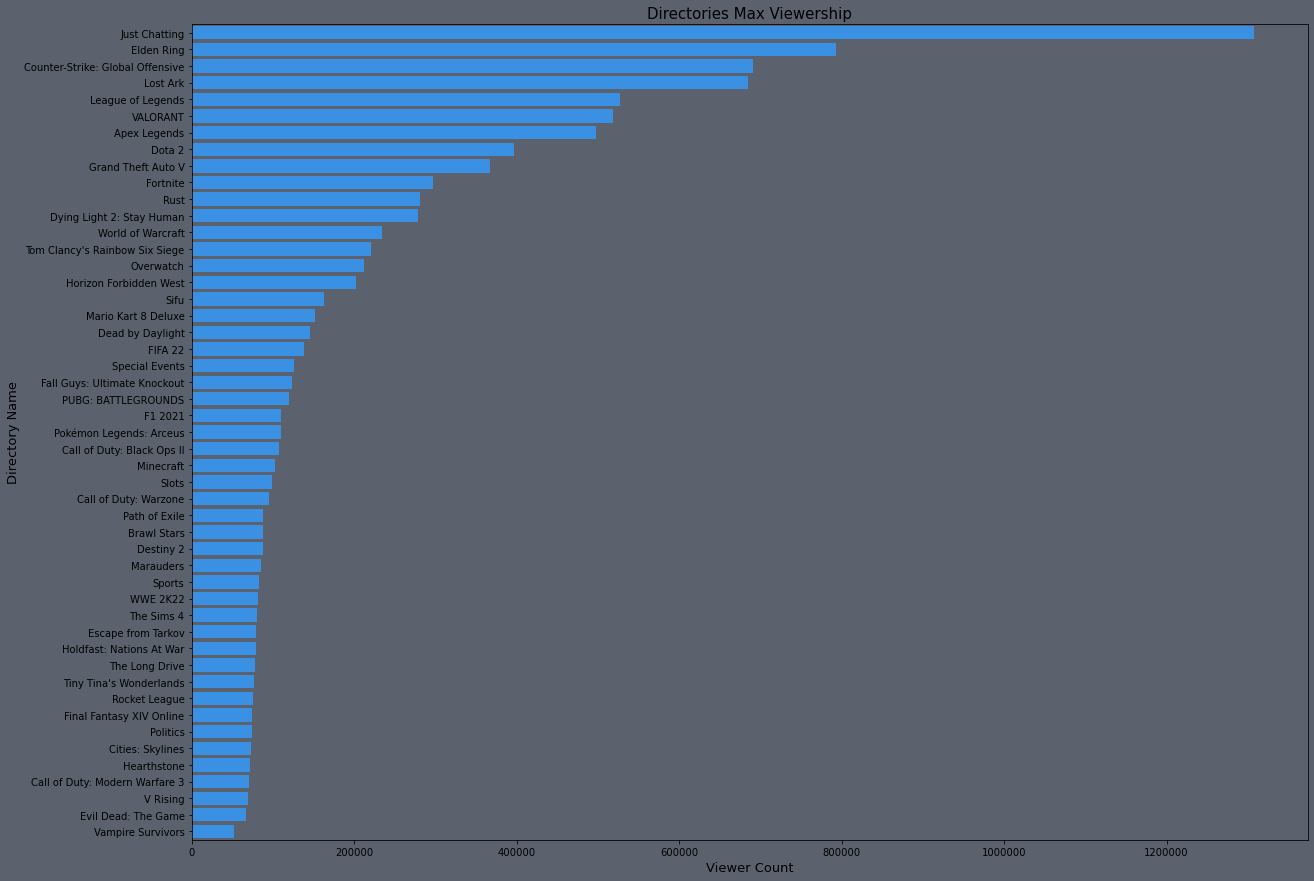

In [72]:
from matplotlib.ticker import FormatStrFormatter
fig = plt.figure(figsize=(20,15))
ax = plt.axes()

fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')

sns.barplot( max_viewers['Viewer Count'], max_viewers['Directory Name'], color='dodgerBlue')
plt.title('Directories Max Viewership', fontsize=15)
plt.ylabel('Directory Name', fontsize=13)
plt.xlabel('Viewer Count', fontsize=13)


ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()